In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [53]:
#LOADING DATASET
df=pd.read_csv(r"C:\Users\Muskan\Downloads\Twitter Sentiments.csv")
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [54]:
#Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [55]:
#preprocessing the dataset

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    cleaned_text = ' '.join([word for word in input_txt.split() if word not in r])
    return cleaned_text


In [56]:
#Convert to lowercase
df['clean_text'] = df['tweet'].str.lower()
df.head()
#removal of punctuations
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
df['clean_text'] = df['clean_text'].apply(remove_punctuations)
print(df.head())

   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                          clean_text  
0   user when a father is dysfunctional and is so...  
1  user user thanks for lyft credit i cant use ca...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4               factsguide society now    motivation  


In [65]:
# Individual words considered as tokens
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [user, when, a, father, is, dysfunctional, and...
1    [user, user, thanks, for, lyft, credit, i, can...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4               [factsguide, society, now, motivation]
Name: clean_text, dtype: object

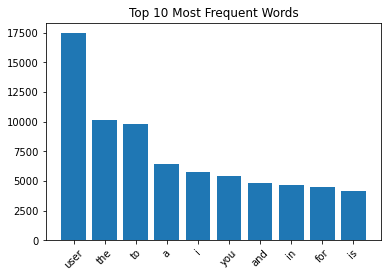

In [15]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of all tokenized words
all_words = [word for sentence in tokenized_tweet for word in sentence]
word_counts = Counter(all_words).most_common(10)

# Unpack words and their counts for plotting
words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.show()


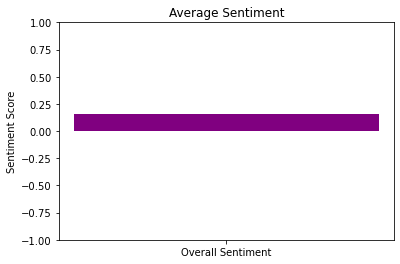

In [72]:
import matplotlib.pyplot as plt

# Calculate overall average sentiment
average_sentiment = df['sentiment'].mean()

# Create a single-point plot for visualization
plt.figure(figsize=(6, 4))
plt.bar(['Overall Sentiment'], [average_sentiment], color='purple')
plt.title('Average Sentiment')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)  # Sentiment polarity typically ranges between -1 and 1
plt.show()
